# Crossmatching Catalogs
*Part 1 of AGN Variability.*

## Background
Based on *Project #2: Deduce the dependence of variability of AGN*
from the ['Science Projects with LSDB' January 2025 Google Doc](https://docs.google.com/document/d/1yb43z7vrG5-FIL6lNZjVkIx41jKSCl698d51RQhXRqg/edit?tab=t.0).

We use the SDSS Data Release 7 Quasar (Additional Properties) catalog, which can be obtained using the following script described, or from [this page](https://das.sdss.org/va/qso_properties_dr7/dr7.htm) on the SDSS website.

## Download and import catalogs
Note: Epyc users can skip this step and reference the SDSS catalog in `/data3/` 
```bash
! bash 00-download_sdss_dr7qso.sh   # Download the catalog
! python 00-import_sdss_dr7qso.py   # Import as HATS
```

In [ ]:
import lsdb

In [2]:
# Import SDSS

sdss_dir = "/data3/epyc/data3/hats/raw/sdss/sdss_dr7_qso_props/"
sdss = lsdb.read_hats(
    sdss_dir,
    columns=["RA", "DEC", "REDSHIFT", "SDSS_NAME", "LOGBH"]
)

['func', 'iterables', 'args', 'meta', 'divisions', 'label', 'enforce_metadata', 'kwargs']


In [3]:
# Import ZTF

ztf_path = "/data3/epyc/data3/hats/catalogs/ztf_dr22/ztf_lc"
ztf_margin_path = "/data3/epyc/data3/hats/catalogs/ztf_dr22/ztf_lc_10arcs"
ztf = lsdb.read_hats(
    ztf_path, margin_cache=ztf_margin_path, columns=[
        "objectid", "objra", "objdec", "filterid", "nepochs", "hmjd", "mag", "magerr"
    ]
)

['func', 'iterables', 'args', 'meta', 'divisions', 'label', 'enforce_metadata', 'kwargs']
['func', 'iterables', 'args', 'meta', 'divisions', 'label', 'enforce_metadata', 'kwargs']


## Crossmatch catalogs

In [4]:
sdss_x_ztf = sdss.crossmatch(ztf, n_neighbors=1, radius_arcsec=3, suffixes=["_sdss", "_ztf"])
sdss_x_ztf

,RA_sdss,DEC_sdss,REDSHIFT_sdss,SDSS_NAME_sdss,LOGBH_sdss,objectid_ztf,objra_ztf,objdec_ztf,filterid_ztf,nepochs_ztf,hmjd_ztf,mag_ztf,magerr_ztf,_dist_arcsec
npartitions=2760,,,,,,,,,,,,,,
"Order: 4, Pixel: 0",double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],int64[pyarrow],float[pyarrow],float[pyarrow],int8[pyarrow],int64[pyarrow],list<element: double>[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],double[pyarrow]
"Order: 4, Pixel: 1",...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 5, Pixel: 12282",...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 5, Pixel: 12287",...,...,...,...,...,...,...,...,...,...,...,...,...,...


(<Figure size 1000x500 with 2 Axes>, <WCSAxes: title={'center': 'SDSS x ZTF'}>)

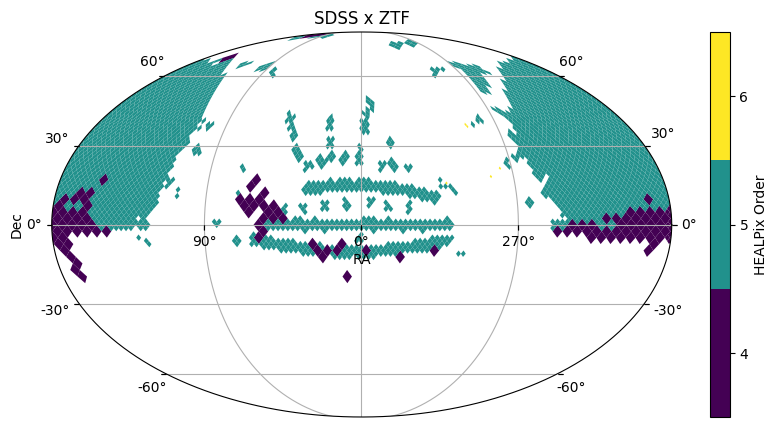

In [5]:
sdss_x_ztf.plot_pixels(plot_title="SDSS x ZTF")

In [6]:
# Compute the first partition

import tempfile
from dask.distributed import Client

tmp_path = tempfile.TemporaryDirectory(dir="/data3/epyc/data3/hats/raw/sdss/")
tmp_dir = tmp_path.name
with Client(n_workers=16, threads_per_worker=1, local_directory=tmp_dir, memory_limit="20GB") as client:
    display(client)
    ndf = sdss_x_ztf.partitions[0].compute()

/astro/users/olynn/.conda/envs/p311/lib/python3.11/site-packages/distributed/node.py:173: ResourceWarning: unclosed <socket.socket fd=69, family=2, type=1, proto=6, laddr=('0.0.0.0', 0)>
  if retries_left < 1:
/astro/users/olynn/.conda/envs/p311/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38503 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38503/status,
Dashboard: http://127.0.0.1:38503/status,Workers: 16
Total threads: 16,Total memory: 298.02 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39245,Workers: 16
Dashboard: http://127.0.0.1:38503/status,Total threads: 16
Started: Just now,Total memory: 298.02 GiB
Comm: tcp://127.0.0.1:35021,Total threads: 1
Dashboard: http://127.0.0.1:46152/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:37014,


In [7]:
ndf

,RA_sdss,DEC_sdss,REDSHIFT_sdss,SDSS_NAME_sdss,LOGBH_sdss,objectid_ztf,objra_ztf,objdec_ztf,filterid_ztf,nepochs_ztf,hmjd_ztf,mag_ztf,magerr_ztf,_dist_arcsec
_healpix_29,,,,,,,,,,,,,,
1748843545125,45.075508,0.152306,2.2308,030018.12+000908.3,9.273159,402314400000703,45.075535,0.152292,3,26,[59211.19299 59220.18693 59232.24832 59253.137...,[19.919155 20.330544 20.478958 20.249365 20.09...,[0.16309905 0.19148526 0.19479676 0.18755566 0...,0.10548
2976627715402,44.884758,0.164801,0.8064,025932.34+000953.2,8.307456,402214400015996,44.884762,0.164826,2,170,[58345.47684 58346.45576 58347.4427 58348.459...,[20.479105 21.008183 20.898762 20.825438 20.69...,[0.1734622 0.21954441 0.2100594 0.20370328 0...,0.092813
5459300610667,45.18858,0.282409,1.7422,030045.25+001656.6,9.3182,402214100007624,45.188557,0.282438,2,397,[58319.46343 58323.48325 58330.41979 58336.462...,[18.99347 19.013866 18.882828 19.041561 19.08...,[0.06750444 0.06855152 0.06210198 0.06999939 0...,0.134617
5858887011909,45.339138,0.290646,0.4101,030121.39+001726.3,7.203714,1447207200009528,45.339123,0.290644,2,58,[58356.39091 58386.38343 58423.37972 58424.296...,[19.812162 19.676159 19.867046 19.709583 19.71...,[0.12427196 0.11277227 0.12912114 0.11552699 0...,0.050533
7934686108383,45.189484,0.35918,1.4969,030045.47+002133.0,9.479626,402314100005023,45.189465,0.359199,3,66,[59184.33481 59187.27468 59200.28726 59203.257...,[19.072502 19.226034 19.1189 19.187363 19.26...,[0.10053448 0.11244124 0.10403369 0.1093551 0...,0.090226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183364305466072,44.046345,1.20971,1.8652,025611.12+011234.9,9.389333,1447212400004328,44.046337,1.209713,2,26,[58423.37976 58425.30813 58429.32808 58432.318...,[20.811016 20.516762 20.660496 20.837013 20.35...,[0.21611822 0.19033718 0.20293033 0.21839595 0...,0.030953
183446950535900,44.04546,1.223442,0.9871,025610.91+011324.3,8.021559,1447112400002514,44.045422,1.223423,1,27,[58384.36184 58430.31485 58726.50292 58734.481...,[20.599236 20.843351 20.969254 21.203972 20.99...,[0.1637435 0.18248117 0.19214511 0.21016145 0...,0.154632
186480513263349,43.820339,1.192884,2.8391,025516.88+011134.3,9.302475,1447112300002877,43.820316,1.192892,1,55,[58384.36186 58427.33335 58430.31485 58436.247...,[19.531242 19.343212 19.497196 19.407978 19.38...,[0.08546226 0.07456639 0.08339607 0.078177 0...,0.099785


In [8]:
# Pickle it

ndf.to_pickle("/astro/users/olynn/new_sdss_x_ztf_partition_0.pkl")